In [1352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as pe
import plotly.io as pio

**IMPORT DATA**

In [1353]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(f'Importovány nové datasety: \n 1. train tvar: {df_train.shape} \n 2. test tvar: {df_test.shape}')

Importovány nové datasety: 
 1. train tvar: (1460, 81) 
 2. test tvar: (1459, 80)


**REINDEX TEST SET**

RUN ONLY ONCE

In [1354]:
df_test
df_test.index += len(df_train) # run only ONCE !!! asi by bylo lepší přeindexování u obou datasetů 

**JOIN DATA FOR PREPROCESSING**

In [1355]:
df_join = pd.concat([df_train,df_test])
print(f' Spojený dataset tvar: {df_join.shape}')

 Spojený dataset tvar: (2919, 81)


In [1356]:
df_join.select_dtypes(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2916,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


**SELECT COLUMNS FOR PREPROCESSING**

chosen by group decision 

dummy --> get dummies from columns

drops --> drop columns, not interesting or too difficult to manage

ordinal --> get numeric values from categories ordinal

fill_na_mean --> fill na mean

fill_na_zero --> fill na zero

drop na --> drop column because of na

In [1358]:
dummy = ['LotShape',
'LandContour',
'LotConfig',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'Foundation',
'Heating',
'Electrical',
'Functional',
'GarageType',
'SaleType',
'SaleCondition','MSSubClass','MSZoning',
'Exterior1st','Exterior2nd','RoofMatl','RoofStyle',]

ordinal = ['KitchenQual','GarageQual', 'GarageCond','ExterQual','ExterCond','HeatingQC','Utilities','LandSlope','BsmtQual','BsmtCond']

drops = [
'Street',
'Alley',
'Neighborhood',
'MasVnrType',
'MasVnrArea',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinSF1',
'BsmtFinType2',
'BsmtFinSF2',
'BsmtUnfSF',
'FireplaceQu',
'GarageFinish',
'PavedDrive',
'PoolQC',
'Fence',
'MiscFeature',
'MiscVal',
'MoSold']

fill_na_mean = ['BsmtFullBath', 'BsmtHalfBath','TotalBsmtSF','GarageCars','GarageArea','GarageYrBlt']
fil_na_zero = ['LotFrontage']
drop_na = []

# comments sk

'''

TODO Preprocessing

- dummies - get dummies
- ordinal - nahradit kategorické hodnoty číselnou řadou
- drop - vyhodit uplně (zatím)
- booleans - nahradit boolean hodnotou 0 nebo 1

- fillna
- POZOR na SalePrice, abychom si v testu nevyplnili nejakou hodnotou !
            np.where(df_join['SalePrice'].isnull() == True)
- fillna - mean - u některých na vyplnit mean (co fill na u ordinální hodnoty vlastně? - skoro otazka na lektora a nebo vyzkoušet model kde vyplníme mean a model kde vyplníme 0 a pak to porovnat?)
- fill na zero - u některých hodnot vyplnit 0 (LotFrontage)

- zbavit se outliers - smyčka na celý dataset kromě SalePrice - nahradit mean nebo modus, abych nepřišel o hodnoty v jiných sloupcích

- definice funkcí ?

'''



"\n\nTODO Preprocessing\n\n- dummies - get dummies\n- ordinal - nahradit kategorické hodnoty číselnou řadou\n- drop - vyhodit uplně (zatím)\n- booleans - nahradit boolean hodnotou 0 nebo 1\n\n- fillna\n- POZOR na SalePrice, abychom si v testu nevyplnili nejakou hodnotou !\n            np.where(df_join['SalePrice'].isnull() == True)\n- fillna - mean - u některých na vyplnit mean (co fill na u ordinální hodnoty vlastně? - skoro otazka na lektora a nebo vyzkoušet model kde vyplníme mean a model kde vyplníme 0 a pak to porovnat?)\n- fill na zero - u některých hodnot vyplnit 0 (LotFrontage)\n\n- zbavit se outliers - smyčka na celý dataset kromě SalePrice - nahradit mean nebo modus, abych nepřišel o hodnoty v jiných sloupcích\n\n- definice funkcí ?\n\n"

In [1361]:
if len(ordinal) == 10:
    print('ordinal počet sedí')
else:
    print('neni správný počet sloupců v seznamu ordinal')

if len(dummy) == 20:
    print('ordinal počet sedí')
else:
    print('neni správný počet sloupců v seznamu dummy')

if len(drops) == 19:
    print('drop počet sedí')
else:
    print('neni správný počet sloupců v seznamu drops')


ordinal počet sedí
ordinal počet sedí
drop počet sedí


**PREPROCESSING COLUMNS**

loops for preprocessing

In [1372]:
# 1) for smyčka pro dropnutí sloupců, co nechceme

df_join_drops = df_join.copy() # pro noob přehlednost - ale smyčky musí být spuštěny najednou - aby šly za sebou ve správném pořadí

x = 1
for i in drops:
    print(f'{x} dropped : {i}')
    df_join_drops = df_join_drops.drop(f'{i}', axis = 1)
    x += 1

1 dropped : Street
2 dropped : Alley
3 dropped : Neighborhood
4 dropped : MasVnrType
5 dropped : MasVnrArea
6 dropped : BsmtExposure
7 dropped : BsmtFinType1
8 dropped : BsmtFinSF1
9 dropped : BsmtFinType2
10 dropped : BsmtFinSF2
11 dropped : BsmtUnfSF
12 dropped : FireplaceQu
13 dropped : GarageFinish
14 dropped : PavedDrive
15 dropped : PoolQC
16 dropped : Fence
17 dropped : MiscFeature
18 dropped : MiscVal
19 dropped : MoSold


In [1373]:
df_join_drops.shape

(2919, 62)

In [1364]:
df_join_drops.select_dtypes(include=['object'])

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,...,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageQual,GarageCond,SaleType,SaleCondition
0,RL,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,...,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,TA,WD,Normal
1,RL,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,...,Ex,Y,SBrkr,TA,Typ,Attchd,TA,TA,WD,Normal
2,RL,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,...,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,TA,WD,Normal
3,RL,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,...,Gd,Y,SBrkr,Gd,Typ,Detchd,TA,TA,WD,Abnorml
4,RL,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,...,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,TA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,Twnhs,2Story,...,Gd,Y,SBrkr,TA,Typ,NaN,NaN,NaN,WD,Normal
2915,RM,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,TwnhsE,2Story,...,TA,Y,SBrkr,TA,Typ,CarPort,TA,TA,WD,Abnorml
2916,RL,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,...,Ex,Y,SBrkr,TA,Typ,Detchd,TA,TA,WD,Abnorml
2917,RL,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,SFoyer,...,TA,Y,SBrkr,TA,Typ,NaN,NaN,NaN,WD,Normal


In [1368]:
# 2) for smyčka na dummies

len_join = len(df_join)

df_dummies = pd.DataFrame(columns = ['Id_dumm'])
df_dummies['Id_dumm'] = np.array(range(1,len_join+1)) # protože SHORA OTEVŘENÝ !!!!

x = 1

for i in dummy:
    print(f'{x} dummied : {i}')
    dummy_col = df_join[f'{i}']
    Dummies = pd.get_dummies(dummy_col, prefix = f'{i}', dummy_na=True)
    df_join_drops = df_join_drops.drop(f'{i}', axis = 1)
    df_dummies= df_dummies.join(Dummies)
    x += 1

df_join_dummies = df_join_drops.join(df_dummies)
df_join_dummies = df_join_dummies.drop('Id_dumm', axis = 1)




1 dummied : LotShape
2 dummied : LandContour
3 dummied : LotConfig
4 dummied : Condition1
5 dummied : Condition2
6 dummied : BldgType
7 dummied : HouseStyle
8 dummied : Foundation
9 dummied : Heating
10 dummied : Electrical
11 dummied : Functional
12 dummied : GarageType
13 dummied : SaleType
14 dummied : SaleCondition
15 dummied : MSSubClass
16 dummied : MSZoning
17 dummied : Exterior1st
18 dummied : Exterior2nd
19 dummied : RoofMatl
20 dummied : RoofStyle


In [1376]:
df_join_dummies.shape

(2919, 216)

In [1320]:
print(f'spojením df_join_drops {df_join_drops.shape} bez 14 sloupců, co odpadnou při tvorbě dummies, přidáním df_dummies {df_dummies.shape} vzniká po vyhození sloupce Id_dumm (pracovní) df_join_dummies {df_join_dummies.shape}')

spojením df_join_drops (2919, 42) bez 14 sloupců, co odpadnou při tvorbě dummies, přidáním df_dummies (2919, 175) vzniká po vyhození sloupce Id_dumm (pracovní) df_join_dummies (2919, 216)


In [1321]:
 # tahle implementace padala při více než 70 řádcích, protože při připojování dalších sloupců se to zaseklo z nějakýho důvodu (paměť)

'''

for i in dummy[3:4]:
    print(i)
    dummy_col = df_join_dummies[f'{i}']
    Dummies = pd.get_dummies(dummy_col, prefix = f'{i}', dummy_na=True)
    df_join_dummies = df_join_dummies.drop(f'{i}', axis = 1)
    df_join_dummies = df_join_dummies.join(Dummies)

'''

"\n\nfor i in dummy[3:4]:\n   print(i)\n   dummy_col = df_join_dummies[f'{i}']\n   Dummies = pd.get_dummies(dummy_col, prefix = f'{i}', dummy_na=True)\n   df_join_dummies = df_join_dummies.drop(f'{i}', axis = 1)\n   df_join_dummies = df_join_dummies.join(Dummies)\n\n"

In [1322]:
df_join_dummies.select_dtypes(include=['object'])

,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,CentralAir,KitchenQual,GarageQual,GarageCond
0,AllPub,Gtl,Gd,TA,Gd,TA,Ex,Y,Gd,TA,TA
1,AllPub,Gtl,TA,TA,Gd,TA,Ex,Y,TA,TA,TA
2,AllPub,Gtl,Gd,TA,Gd,TA,Ex,Y,Gd,TA,TA
3,AllPub,Gtl,TA,TA,TA,Gd,Gd,Y,Gd,TA,TA
4,AllPub,Gtl,Gd,TA,Gd,TA,Ex,Y,Gd,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...
2914,AllPub,Gtl,TA,TA,TA,TA,Gd,Y,TA,NaN,NaN
2915,AllPub,Gtl,TA,TA,TA,TA,TA,Y,TA,TA,TA
2916,AllPub,Gtl,TA,TA,TA,TA,Ex,Y,TA,TA,TA
2917,AllPub,Gtl,TA,TA,Gd,TA,TA,Y,TA,NaN,NaN


In [1323]:
# 3) nahrazení ordinal hodnot číselnou řadou 

df_join_ordinals = df_join_dummies.copy() # pro noob přehlednost - ale smyčky musí být spuštěny najednou - aby šly za sebou ve správném pořadí


df_join_ordinals.shape

(2919, 216)

In [1324]:
# 3 přepsat ordinální kategorie na číselnou reprezentaci - tohle neni funkcni? 
'''



df_join_ordinals[f'KitchenQual'] = df_join_ordinals[f'KitchenQual'].replace(['Ex', 'Gd', 'TA','Fa','Po'], [int(4),int(3),int(2),int(1),int(0)]) # jsou-li standardni - mohla by se udelat smycka
df_join_ordinals[f'GarageQual'] = df_join_ordinals[f'GarageQual'].replace(['Ex', 'Gd', 'TA','Fa','Po'], [int(4),int(3),int(2),int(1),int(0)])
df_join_ordinals[f'GarageCond'] = df_join_ordinals[f'GarageCond'].replace(['Ex', 'Gd', 'TA','Fa','Po'], [int(4),int(3),int(2),int(1),int(0)])
df_join_ordinals[f'ExterQual'] = df_join_ordinals[f'ExterQual'].replace(['Ex', 'Gd', 'TA','Fa','Po'], [int(4),int(3),int(2),int(1),int(0)])
df_join_ordinals[f'ExterCond'] = df_join_ordinals[f'ExterCond'].replace(['Ex', 'Gd', 'TA','Fa','Po'], [int(4),int(3),int(2),int(1),int(0)])
df_join_ordinals[f'HeatingQC'] = df_join_ordinals[f'HeatingQC'].replace(['Ex', 'Gd', 'TA','Fa','Po'],[int(4),int(3),int(2),int(1),int(0)])
df_join_ordinals[f'BsmtQual'] = df_join_ordinals[f'BsmtQual'].replace(['Ex', 'Gd', 'TA','Fa','Po'], [int(4),int(3),int(2),int(1),int(0)])
df_join_ordinals[f'BsmtCond'] = df_join_ordinals[f'BsmtCond'].replace(['Ex', 'Gd', 'TA','Fa','Po'], [int(4),int(3),int(2),int(1),int(0)])


df_join_ordinals[f'Utilities'] = df_join_ordinals[f'Utilities'].replace(['AllPub', 'NoSewr', 'NoSeWa','ELO'], [int(3),int(2),int(1),int(0)])
df_join_ordinals[f'LandSlope'] = df_join_ordinals[f'LandSlope'].replace(['Gtl', 'Mod', 'Sev'], [int(2),int(1),int(0)])


# vyplnit na hodnoty průměrnou známkou (odpovídá TA)


x = 1
for i in ordinal:
    print(f'{x} ordinaled : {i}')
    df_join_ordinals[f'{i}'] = df_join_ordinals[f'{i}'].fillna(df_join_ordinals[f'{i}'].mean)
    x += 1

'''

"\n\n\n\ndf_join_ordinals[f'KitchenQual'] = df_join_ordinals[f'KitchenQual'].replace(['Ex', 'Gd', 'TA','Fa','Po'], [int(4),int(3),int(2),int(1),int(0)]) # jsou-li standardni - mohla by se udelat smycka\ndf_join_ordinals[f'GarageQual'] = df_join_ordinals[f'GarageQual'].replace(['Ex', 'Gd', 'TA','Fa','Po'], [int(4),int(3),int(2),int(1),int(0)])\ndf_join_ordinals[f'GarageCond'] = df_join_ordinals[f'GarageCond'].replace(['Ex', 'Gd', 'TA','Fa','Po'], [int(4),int(3),int(2),int(1),int(0)])\ndf_join_ordinals[f'ExterQual'] = df_join_ordinals[f'ExterQual'].replace(['Ex', 'Gd', 'TA','Fa','Po'], [int(4),int(3),int(2),int(1),int(0)])\ndf_join_ordinals[f'ExterCond'] = df_join_ordinals[f'ExterCond'].replace(['Ex', 'Gd', 'TA','Fa','Po'], [int(4),int(3),int(2),int(1),int(0)])\ndf_join_ordinals[f'HeatingQC'] = df_join_ordinals[f'HeatingQC'].replace(['Ex', 'Gd', 'TA','Fa','Po'],[int(4),int(3),int(2),int(1),int(0)])\ndf_join_ordinals[f'BsmtQual'] = df_join_ordinals[f'BsmtQual'].replace(['Ex', 'Gd', 'TA','

In [1325]:
# 3 přepsat ordinální kategorie na číselnou reprezentaci - druhy pokus

mapping = {'Ex' : 4, 'Gd' : 3, 'TA' :2 , 'Fa' : 1, 'Po' : 0}


df_join_ordinals[f'KitchenQual'] = df_join_ordinals[f'KitchenQual'].replace({'Ex' : 4, 'Gd' : 3, 'TA' :2 , 'Fa' : 1, 'Po' : 0}) # jsou-li standardni - mohla by se udelat smycka
df_join_ordinals[f'GarageQual'] = df_join_ordinals[f'GarageQual'].replace({'Ex' : 4, 'Gd' : 3, 'TA' :2 , 'Fa' : 1, 'Po' : 0})
df_join_ordinals[f'GarageCond'] = df_join_ordinals[f'GarageCond'].replace({'Ex' : 4, 'Gd' : 3, 'TA' :2 , 'Fa' : 1, 'Po' : 0})
df_join_ordinals[f'ExterQual'] = df_join_ordinals[f'ExterQual'].replace({'Ex' : 4, 'Gd' : 3, 'TA' :2 , 'Fa' : 1, 'Po' : 0})
df_join_ordinals[f'ExterCond'] = df_join_ordinals[f'ExterCond'].replace({'Ex' : 4, 'Gd' : 3, 'TA' :2 , 'Fa' : 1, 'Po' : 0})
df_join_ordinals[f'HeatingQC'] = df_join_ordinals[f'HeatingQC'].replace({'Ex' : 4, 'Gd' : 3, 'TA' :2 , 'Fa' : 1, 'Po' : 0})
df_join_ordinals[f'BsmtQual'] = df_join_ordinals[f'BsmtQual'].replace({'Ex' : 4, 'Gd' : 3, 'TA' :2 , 'Fa' : 1, 'Po' : 0})
df_join_ordinals[f'BsmtCond'] = df_join_ordinals[f'BsmtCond'].replace({'Ex' : 4, 'Gd' : 3, 'TA' :2 , 'Fa' : 1, 'Po' : 0})


df_join_ordinals[f'Utilities'] = df_join_ordinals[f'Utilities'].replace(['AllPub', 'NoSewr', 'NoSeWa','ELO'], [int(3),int(2),int(1),int(0)])
df_join_ordinals[f'LandSlope'] = df_join_ordinals[f'LandSlope'].replace(['Gtl', 'Mod', 'Sev'], [int(2),int(1),int(0)])


# vyplnit na hodnoty průměrnou známkou (odpovídá TA)

x = 1
for i in ordinal:
    print(f'{x} ordinaled : {i}')
    df_join_ordinals[f'{i}'] = df_join_ordinals[f'{i}'].fillna(df_join_ordinals[f'{i}'].mean())
    x += 1

1 ordinaled : KitchenQual
2 ordinaled : GarageQual
3 ordinaled : GarageCond
4 ordinaled : ExterQual
5 ordinaled : ExterCond
6 ordinaled : HeatingQC
7 ordinaled : Utilities
8 ordinaled : LandSlope
9 ordinaled : BsmtQual
10 ordinaled : BsmtCond


In [1326]:
df_join_ordinals.select_dtypes(include=['object'])

,CentralAir
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
2914,Y
2915,Y
2916,Y
2917,Y


In [1327]:
# 4) vyplnit NA hodnoty průměrem tam kde to dává smysl

df_join_fillna = df_join_ordinals.copy()

x = 1
for i in fill_na_mean:
    print(f'{x} filled mean : {i}')
    df_join_fillna[f'{i}'] = df_join_fillna[f'{i}'].fillna(df_join_fillna[f'{i}'].mean())
    x += 1

# 5) vyplnit NA hodnoty nulou u hodnot, kde to dává smysl

df_join_fillna['LotFrontage'] = df_join_fillna['LotFrontage'].fillna(int(0))
print('0 filled zero :  LotFrontage')


# 6 zaměnit kategorie boolean hodnotami, tam kde to dává smysl

df_join_fillna[f'CentralAir'] = df_join_ordinals[f'CentralAir'].replace({'Y' : 1, 'N' : 0})
print('0 - 1 filled boolean : CentralAir')



1 filled mean : BsmtFullBath
2 filled mean : BsmtHalfBath
3 filled mean : TotalBsmtSF
4 filled mean : GarageCars
5 filled mean : GarageArea
6 filled mean : GarageYrBlt
0 filled zero :  LotFrontage
0 - 1 filled boolean : CentralAir


In [1328]:
df_join_fillna.select_dtypes(include=['object'])


""
0
1
2
3
4
...
2914
2915
2916
2917


In [1329]:
for i in range(0,143):
    print(df_join_fillna.iloc[:,i].info())

<class 'pandas.core.series.Series'>
RangeIndex: 2919 entries, 0 to 2918
Series name: Id
Non-Null Count  Dtype
--------------  -----
2919 non-null   int64
dtypes: int64(1)
memory usage: 22.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2919 entries, 0 to 2918
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
2919 non-null   float64
dtypes: float64(1)
memory usage: 22.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2919 entries, 0 to 2918
Series name: LotArea
Non-Null Count  Dtype
--------------  -----
2919 non-null   int64
dtypes: int64(1)
memory usage: 22.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2919 entries, 0 to 2918
Series name: Utilities
Non-Null Count  Dtype  
--------------  -----  
2919 non-null   float64
dtypes: float64(1)
memory usage: 22.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2919 entries, 0 to 2918
Series name: LandSlope
Non-Null Count  Dtype
--------------  -----
2919 non-null   int64
dtypes: in

In [1330]:
df_join_fillna.isna().sum().sort_values(ascending=0)[:30]

SalePrice                1459
MSSubClass_60.0             0
SaleCondition_AdjLand       0
SaleCondition_Alloca        0
SaleCondition_Family        0
SaleCondition_Normal        0
SaleCondition_Partial       0
SaleCondition_nan           0
MSSubClass_20.0             0
MSSubClass_30.0             0
MSSubClass_40.0             0
MSSubClass_45.0             0
MSSubClass_50.0             0
Id                          0
MSZoning_FV                 0
MSSubClass_70.0             0
MSSubClass_75.0             0
MSSubClass_80.0             0
MSSubClass_85.0             0
MSSubClass_90.0             0
MSSubClass_120.0            0
MSSubClass_150.0            0
MSSubClass_160.0            0
MSSubClass_180.0            0
MSSubClass_190.0            0
MSSubClass_nan              0
SaleCondition_Abnorml       0
SaleType_nan                0
SaleType_WD                 0
SaleType_Oth                0
dtype: int64

In [1331]:
df_train_processed = df_join_fillna.iloc[:1460,:]
df_test_processed = df_join_fillna.iloc[1460:,:]

In [1332]:
df_train_processed.isna().sum().sort_values(ascending=False)


Id                       0
MSSubClass_50.0          0
SaleCondition_Abnorml    0
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
                        ..
Condition2_RRNn          0
Condition2_nan           0
BldgType_1Fam            0
BldgType_2fmCon          0
RoofStyle_nan            0
Length: 216, dtype: int64

In [1333]:
df_test_processed.isna().sum().sort_values(ascending=False)

SalePrice                1459
MSSubClass_60.0             0
SaleCondition_AdjLand       0
SaleCondition_Alloca        0
SaleCondition_Family        0
                         ... 
Condition2_nan              0
BldgType_1Fam               0
BldgType_2fmCon             0
BldgType_Duplex             0
RoofStyle_nan               0
Length: 216, dtype: int64

**PREPROCESSING OUTLIERS**

In [1336]:
training_columns = list(df_train_processed.columns)

iqr_df = pd.DataFrame(columns = ['Cols'])

iqr_df['Cols'] = training_columns
iqr_q1 = []
iqr_q3 =[] 
iqr_list = []

for i in training_columns:
    Q1 = df_train_processed[f'{i}'].quantile(0.25)
    Q3 = df_train_processed[f'{i}'].quantile(0.75)
    IQR = Q3 - Q1
    iqr_list += [IQR]
    iqr_q1 += [Q1]  
    iqr_q3 += [Q3]  


iqr_df['IQR'] = iqr_list

iqr_df['Q1'] = iqr_q1

iqr_df['Q3'] = iqr_q3



col_max_list = []
col_min_list = [] 
col_mean = []

for i in training_columns:
    MAX = df_train_processed[f'{i}'].max()
    MIN = df_train_processed[f'{i}'].min()
    MEDIAN = df_train_processed[f'{i}'].mean()

    col_max_list += [MAX]
    col_min_list += [MIN]
    col_mean += [MEDIAN]


iqr_df['MAX'] = col_max_list
iqr_df['MIN'] = col_min_list
iqr_df['Mean'] = col_mean

iqr_df.sort_values('IQR', ascending = False)[:50]


,Cols,IQR,Q1,Q3,MAX,MIN,Mean
41,SalePrice,70135.25,129975.00,200110.25,340000.0,34900.0,170683.516404
2,LotArea,3547.25,7560.00,11107.25,17671.0,1491.0,9331.916399
0,Id,729.50,365.75,1095.25,1460,1,730.500000
17,2ndFlrSF,728.00,0.00,728.00,1818.0,0.0,344.771223
19,GrLivArea,605.50,1129.50,1735.00,2730.0,334.0,1477.573544
16,1stFlrSF,486.00,882.00,1368.00,2136.0,334.0,1143.422284
13,TotalBsmtSF,448.50,816.00,1264.50,2046.0,105.0,1060.079689
31,GarageArea,241.50,334.50,576.00,936.0,0.0,463.978481
34,WoodDeckSF,160.00,0.00,160.00,418.0,0.0,84.667003
35,OpenPorchSF,56.00,0.00,56.00,170.0,0.0,36.098521


In [1335]:
for i in training_columns:
    Q1 = df_train_processed[i].quantile(0.25)
    Q3 = df_train_processed[i].quantile(0.75)
    IQR = Q3 - Q1

    df_train_processed[i] = df_train_processed[i].mask(df_train_processed[i] < (Q1-1.5*IQR), df_train_processed[i].mean())
    df_train_processed[i] = df_train_processed[i].mask(df_train_processed[i] > (Q3+1.5*IQR), df_train_processed[i].mean())

for i in training_columns:
    Q1 = df_test_processed[i].quantile(0.25)
    Q3 = df_test_processed[i].quantile(0.75)
    IQR = Q3 - Q1

    df_test_processed[i] = df_test_processed[i].mask(df_test_processed[i] < (Q1-1.5*IQR), df_test_processed[i].mean())
    df_test_processed[i] = df_test_processed[i].mask(df_test_processed[i] > (Q3+1.5*IQR), df_test_processed[i].mean())

/var/folders/8g/cb2397xn7413gbd89v329pn00000gn/T/ipykernel_49013/3395064151.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8g/cb2397xn7413gbd89v329pn00000gn/T/ipykernel_49013/3395064151.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8g/cb2397xn7413gbd89v329pn00000gn/T/ipykernel_49013/3395064151.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [1281]:
df_train_processed = df_train_processed.drop('Id', axis = 1)
df_test_processed = df_test_processed.drop('Id', axis = 1)

In [1282]:
df_train_processed.isna().sum().sort_values(ascending=False)[:30]

LotFrontage              0
SaleType_nan             0
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
SaleCondition_nan        0
MSSubClass_20.0          0
MSSubClass_30.0          0
MSSubClass_40.0          0
MSSubClass_45.0          0
MSSubClass_50.0          0
MSSubClass_60.0          0
MSSubClass_70.0          0
MSSubClass_75.0          0
MSSubClass_80.0          0
MSSubClass_85.0          0
MSSubClass_90.0          0
MSSubClass_120.0         0
MSSubClass_150.0         0
MSSubClass_160.0         0
MSSubClass_180.0         0
MSSubClass_190.0         0
MSSubClass_nan           0
SaleCondition_Abnorml    0
SaleType_WD              0
MSZoning_FV              0
SaleType_Oth             0
Electrical_nan           0
dtype: int64

**TRAINING**

In [1339]:
from sklearn.model_selection import train_test_split

X = df_train_processed.drop('SalePrice', axis = 1)
y = df_train_processed['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.7, random_state=0)

In [1340]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


model = LinearRegression()

In [1341]:
model.fit(X_train,y_train)

LinearRegression()

In [1342]:
y_pred = model.predict(X_val)

In [1343]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_val, y_pred, squared=False)
print(rmse)

accu_train = model.score(X_train, y_train)
print(accu_train)

accu_test = model.score(X_val, y_val)
print(accu_test)

38501.392253299025
0.8684314973040974
0.5780463208871638


In [1344]:
X_test = df_test_processed.drop('SalePrice', axis = 1)

In [1345]:
y_pred = model.predict(X_test)

In [1346]:
X_test_Id = df_test[["Id"]]

submission001 = X_test_Id.copy()
submission001['SalePrice'] = y_pred

df_test_fin = df_test.copy()

df_test_fin['SalePrice'] = y_pred

In [1347]:

submission001.to_csv('lin_reg_submission_004.csv', index = False)

<AxesSubplot: xlabel='LotArea', ylabel='SalePrice'>

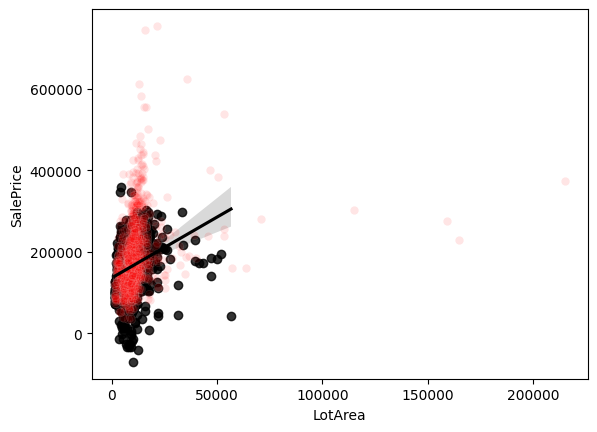

In [1377]:
sns.regplot(data = df_test_fin, x = 'LotArea', y = 'SalePrice', color = 'black')
sns.scatterplot(data = df_train, x = 'LotArea', y = 'SalePrice', alpha = 0.1, color = 'r')


In [847]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5)

for a in MLA:
    a.fit(X_train, y_train)
    scores = cross_val_score(a, X_train, y_train, cv=skf)
    accu_train = a.score(X_train, y_train)
    accu_test = a.score(X_test, y_test)
    rmse = mean_squared_error(y_test, a.predict(X_test), squared=False)
    print(a.__class__.__name__)
    print('CV score: ', round(scores.mean()*100,2))
    print('Train score: ', round(accu_train, 2))
    print('Test score: ', round(accu_test, 2))
    print('RMSE: ', round(rmse, 2))
    print('-----------------------------------------')

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.